In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.columns.tolist()   

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [4]:
#df['month'] = df['Date'].dt.month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

In [5]:
df.drop(['Date'],axis=1, inplace = True)
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,12
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No,12
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No,12
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes,12
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No,12


In [6]:
print("Percentage of null values in columns")
100*np.round(df.isnull().sum()/len(df), 2)

Percentage of null values in columns


Location          0.0
MinTemp           1.0
MaxTemp           1.0
Rainfall          2.0
Evaporation      43.0
Sunshine         48.0
WindGustDir       7.0
WindGustSpeed     7.0
WindDir9am        7.0
WindDir3pm        3.0
WindSpeed9am      1.0
WindSpeed3pm      2.0
Humidity9am       2.0
Humidity3pm       3.0
Pressure9am      10.0
Pressure3pm      10.0
Cloud9am         38.0
Cloud3pm         41.0
Temp9am           1.0
Temp3pm           2.0
RainToday         2.0
RainTomorrow      2.0
Month             0.0
dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
df.shape

(145460, 23)

In [9]:
df.dropna(subset = ["RainTomorrow"], inplace = True)
df["RainTomorrow"].replace({'No': 0, 'Yes': 1},inplace = True)
df["RainTomorrow"] = df.RainTomorrow.astype("int64")

In [10]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,12


In [11]:
df.shape

(142193, 23)

In [12]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Month                0
dtype: int64

In [13]:
print (df['WindGustDir'].describe())
print()
print (df['WindGustDir'].unique())
df['WindGustDir'] = df['WindGustDir'].fillna('W')      # replacing with top value to avoid nan values in the specific column
wind1 = {'W' : 1, 'WNW' : 2, 'WSW' : 3, 'NE' : 4, 'NNW' : 5, 'N' : 6, 'NNE' :7, 'SW' : 8, 'ENE' : 9, 'SSE' : 10,
       'S' : 11, 'NW' : 12, 'SE' : 13, 'ESE': 14, 'E' : 15, 'SSW' : 16}
df['WindGustDir'] = df['WindGustDir'].map(wind1)
print()
print(df['WindGustDir'].dtypes)
df              

count     132863
unique        16
top            W
freq        9780
Name: WindGustDir, dtype: object

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']

int64


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,1,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,2,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,3,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,4,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,1,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,15,31.0,ESE,E,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0,6
145455,Uluru,2.8,23.4,0.0,NaN,NaN,15,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,5,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,6,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0,6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [15]:
def cat_plot(column):
    plt.figure(figsize = (50,20))
    plt.subplot(1, 2, 1)
    plt.pie(x = df[column].value_counts(), labels = df[column].value_counts().index, autopct="%.1f%%", pctdistance =0.7)
    plt.subplot(1, 2, 2)
    sns.countplot(x = column, data = df, hue = "RainTomorrow")

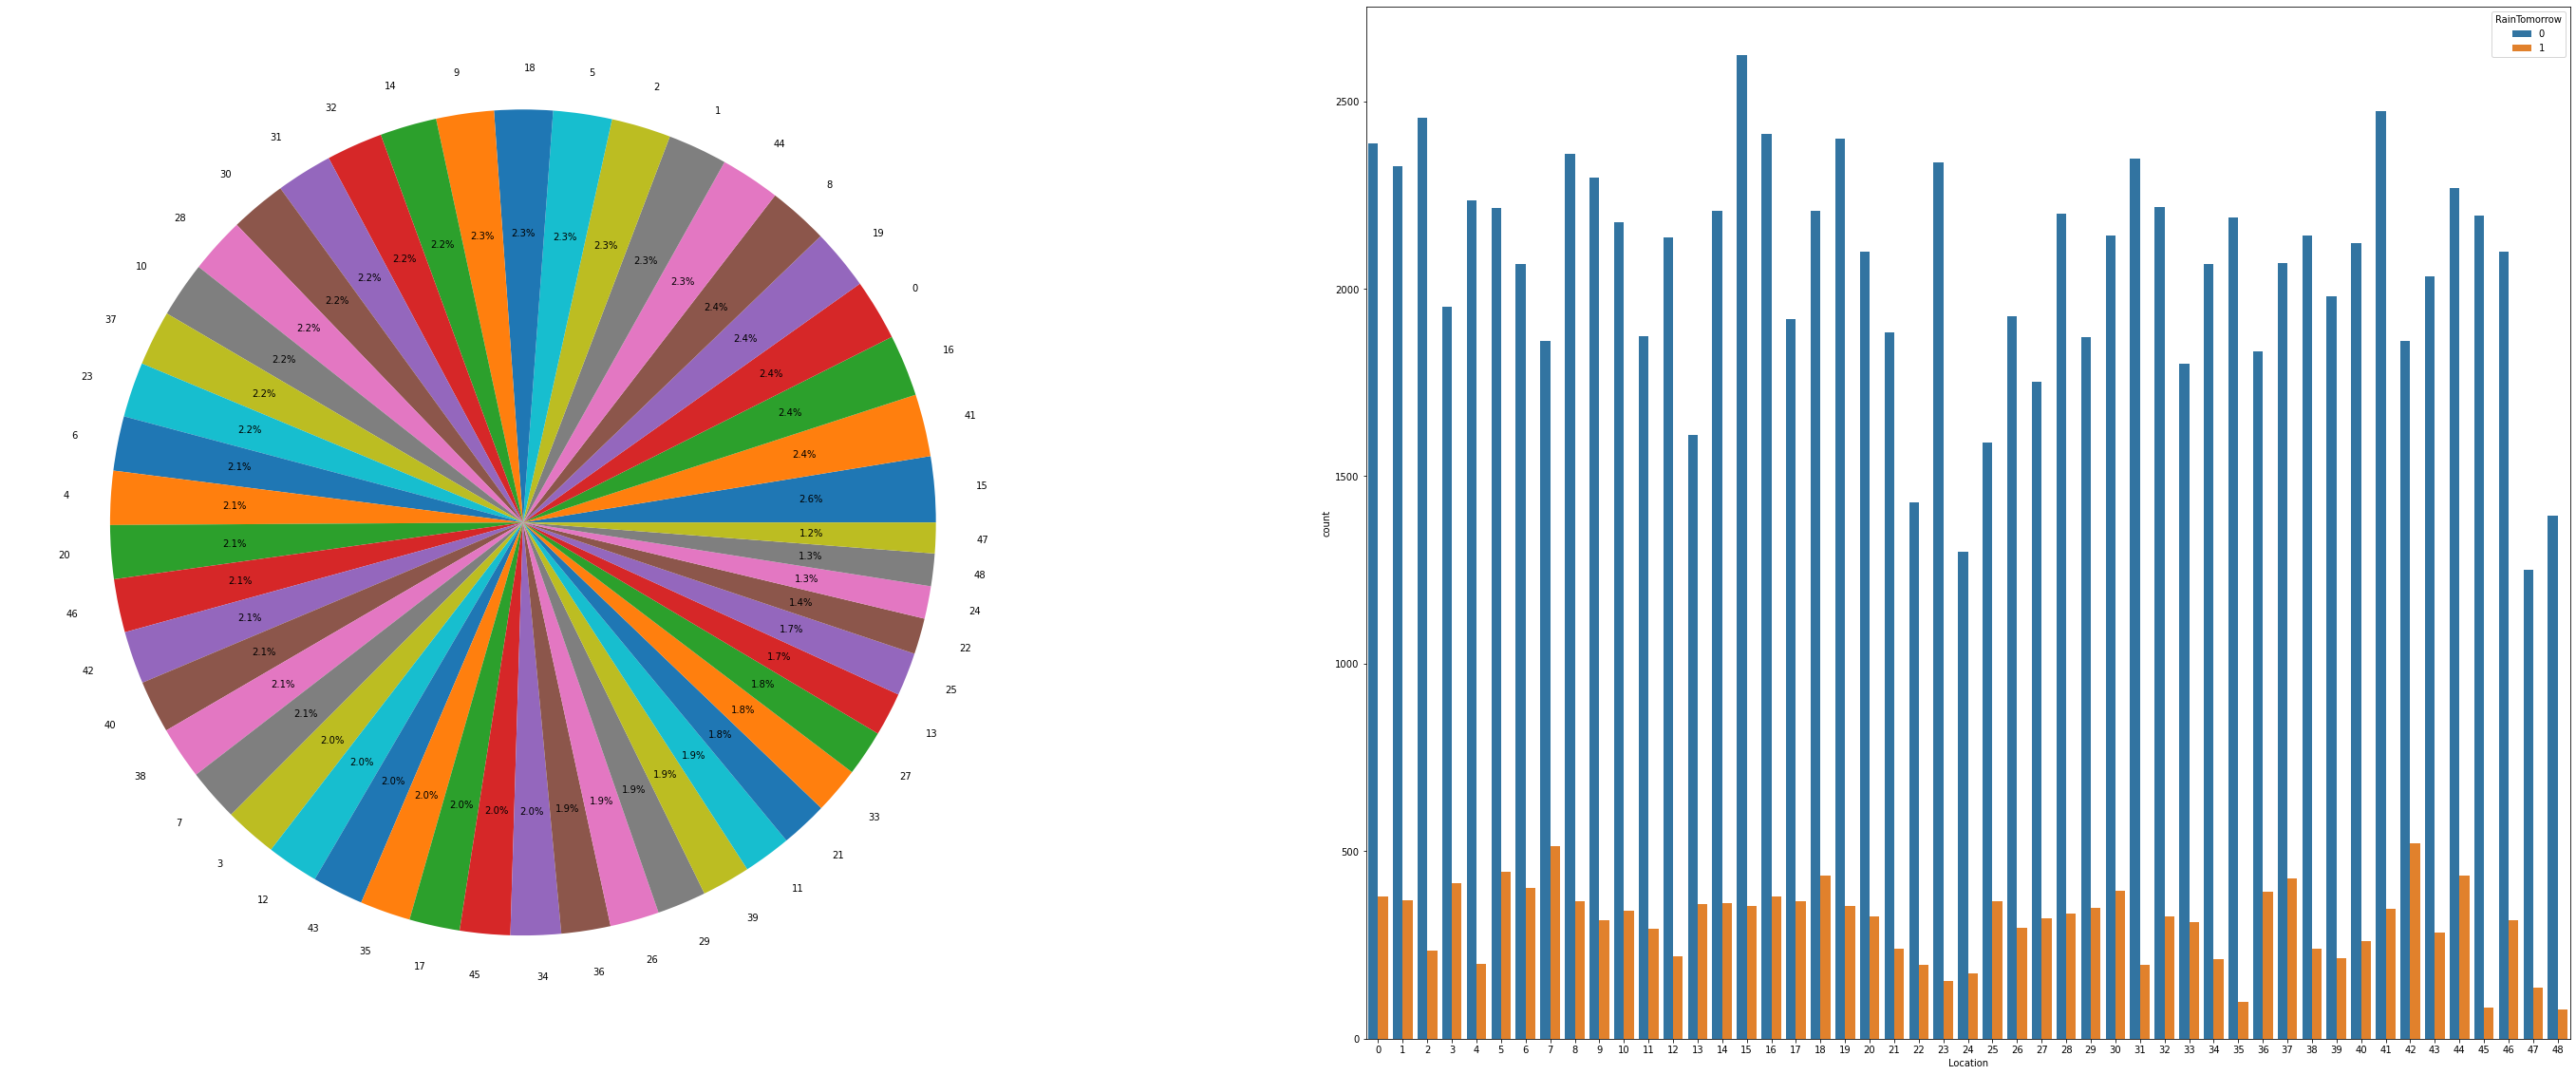

In [60]:
cat_plot('Location')

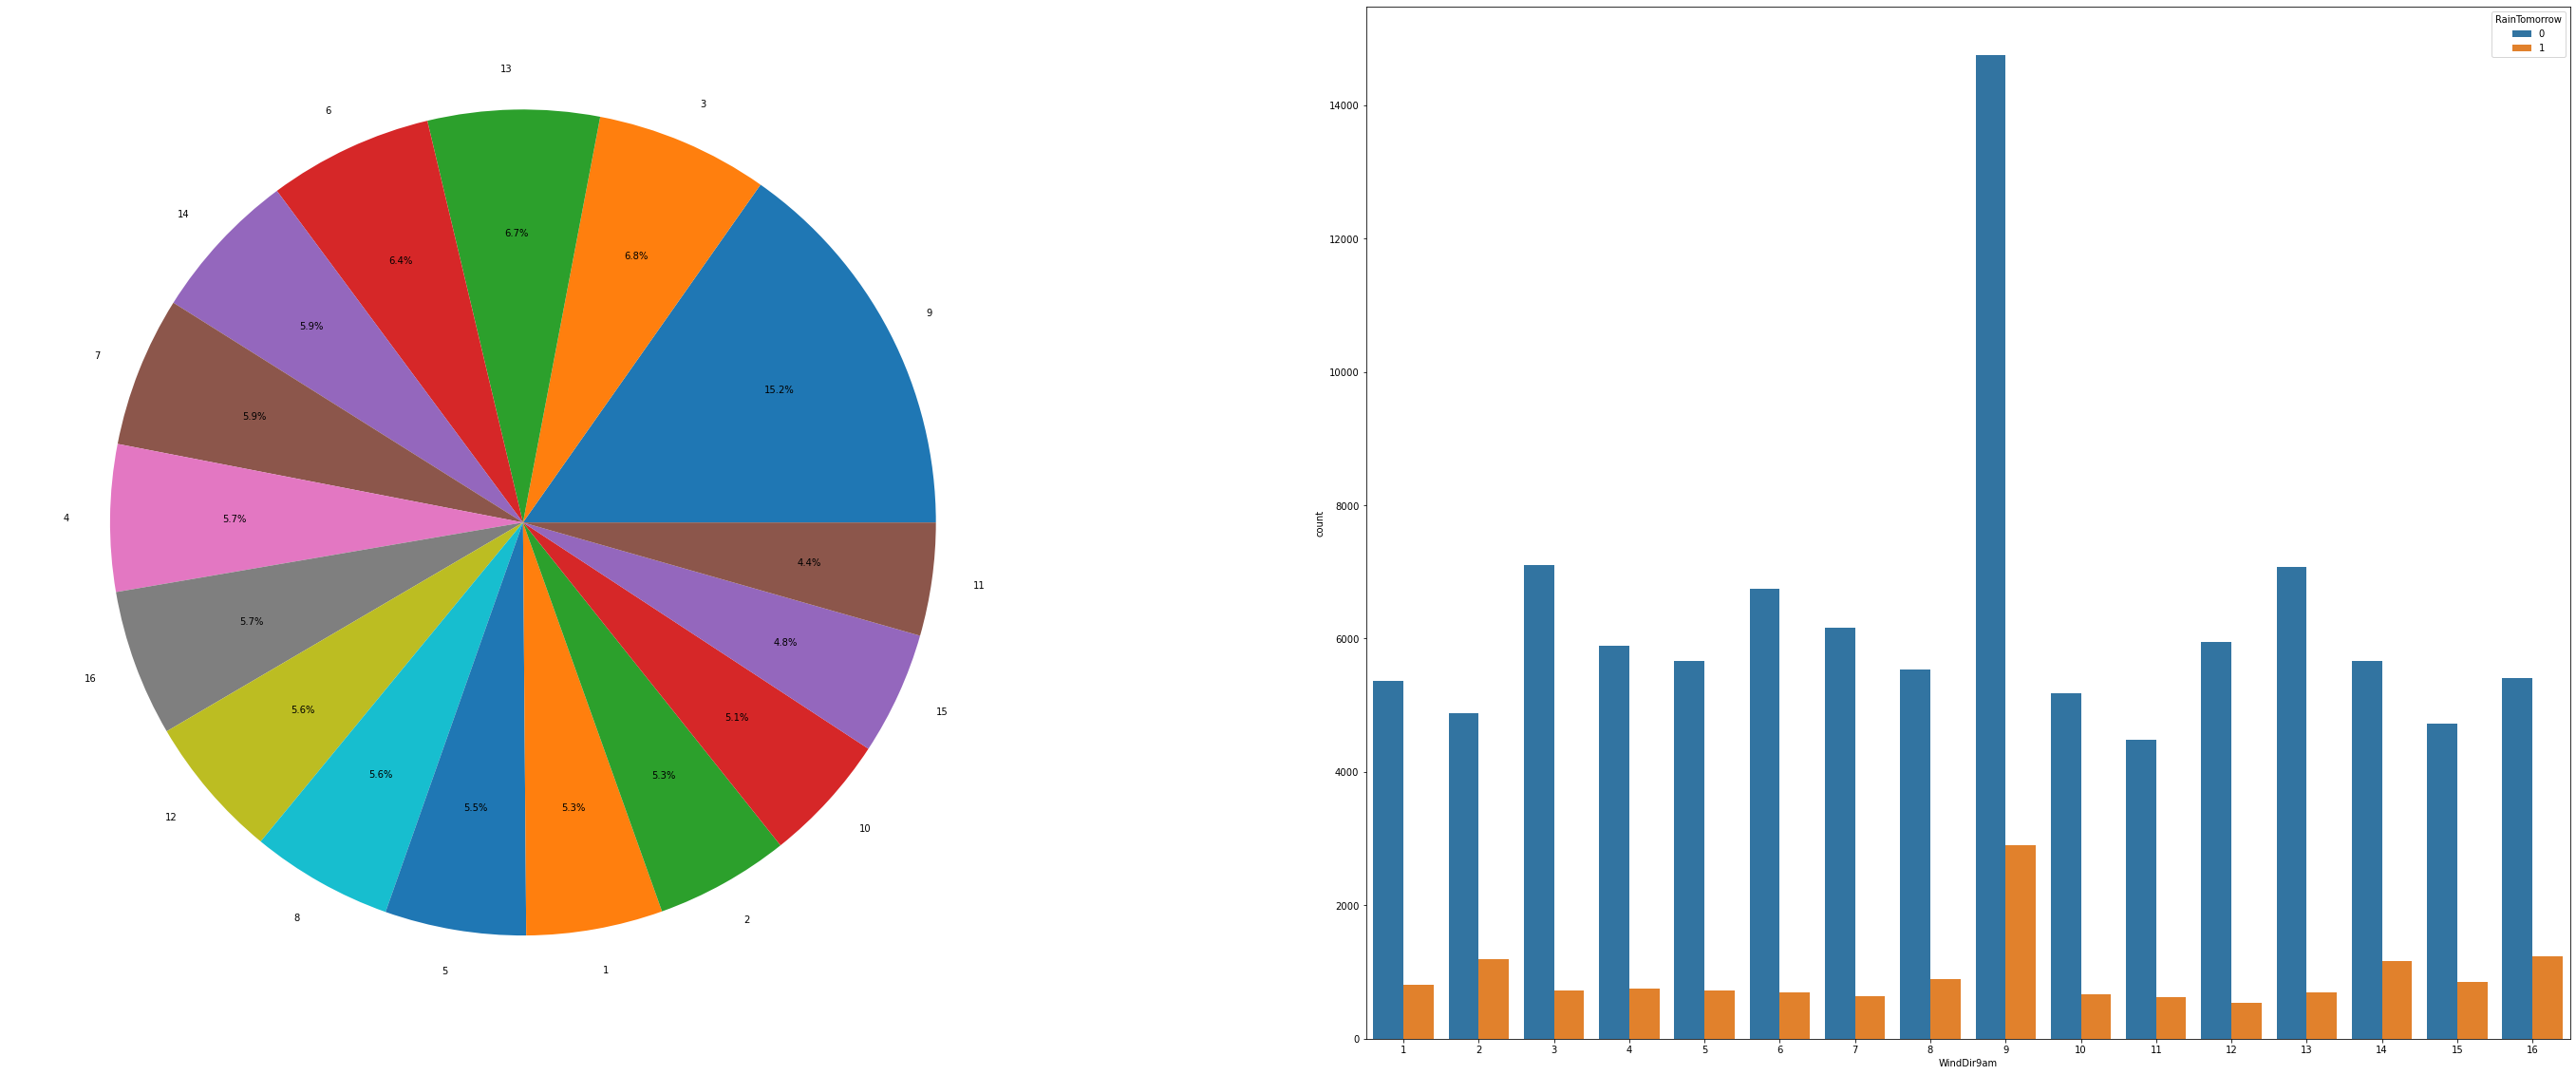

In [61]:
cat_plot('WindDir9am')

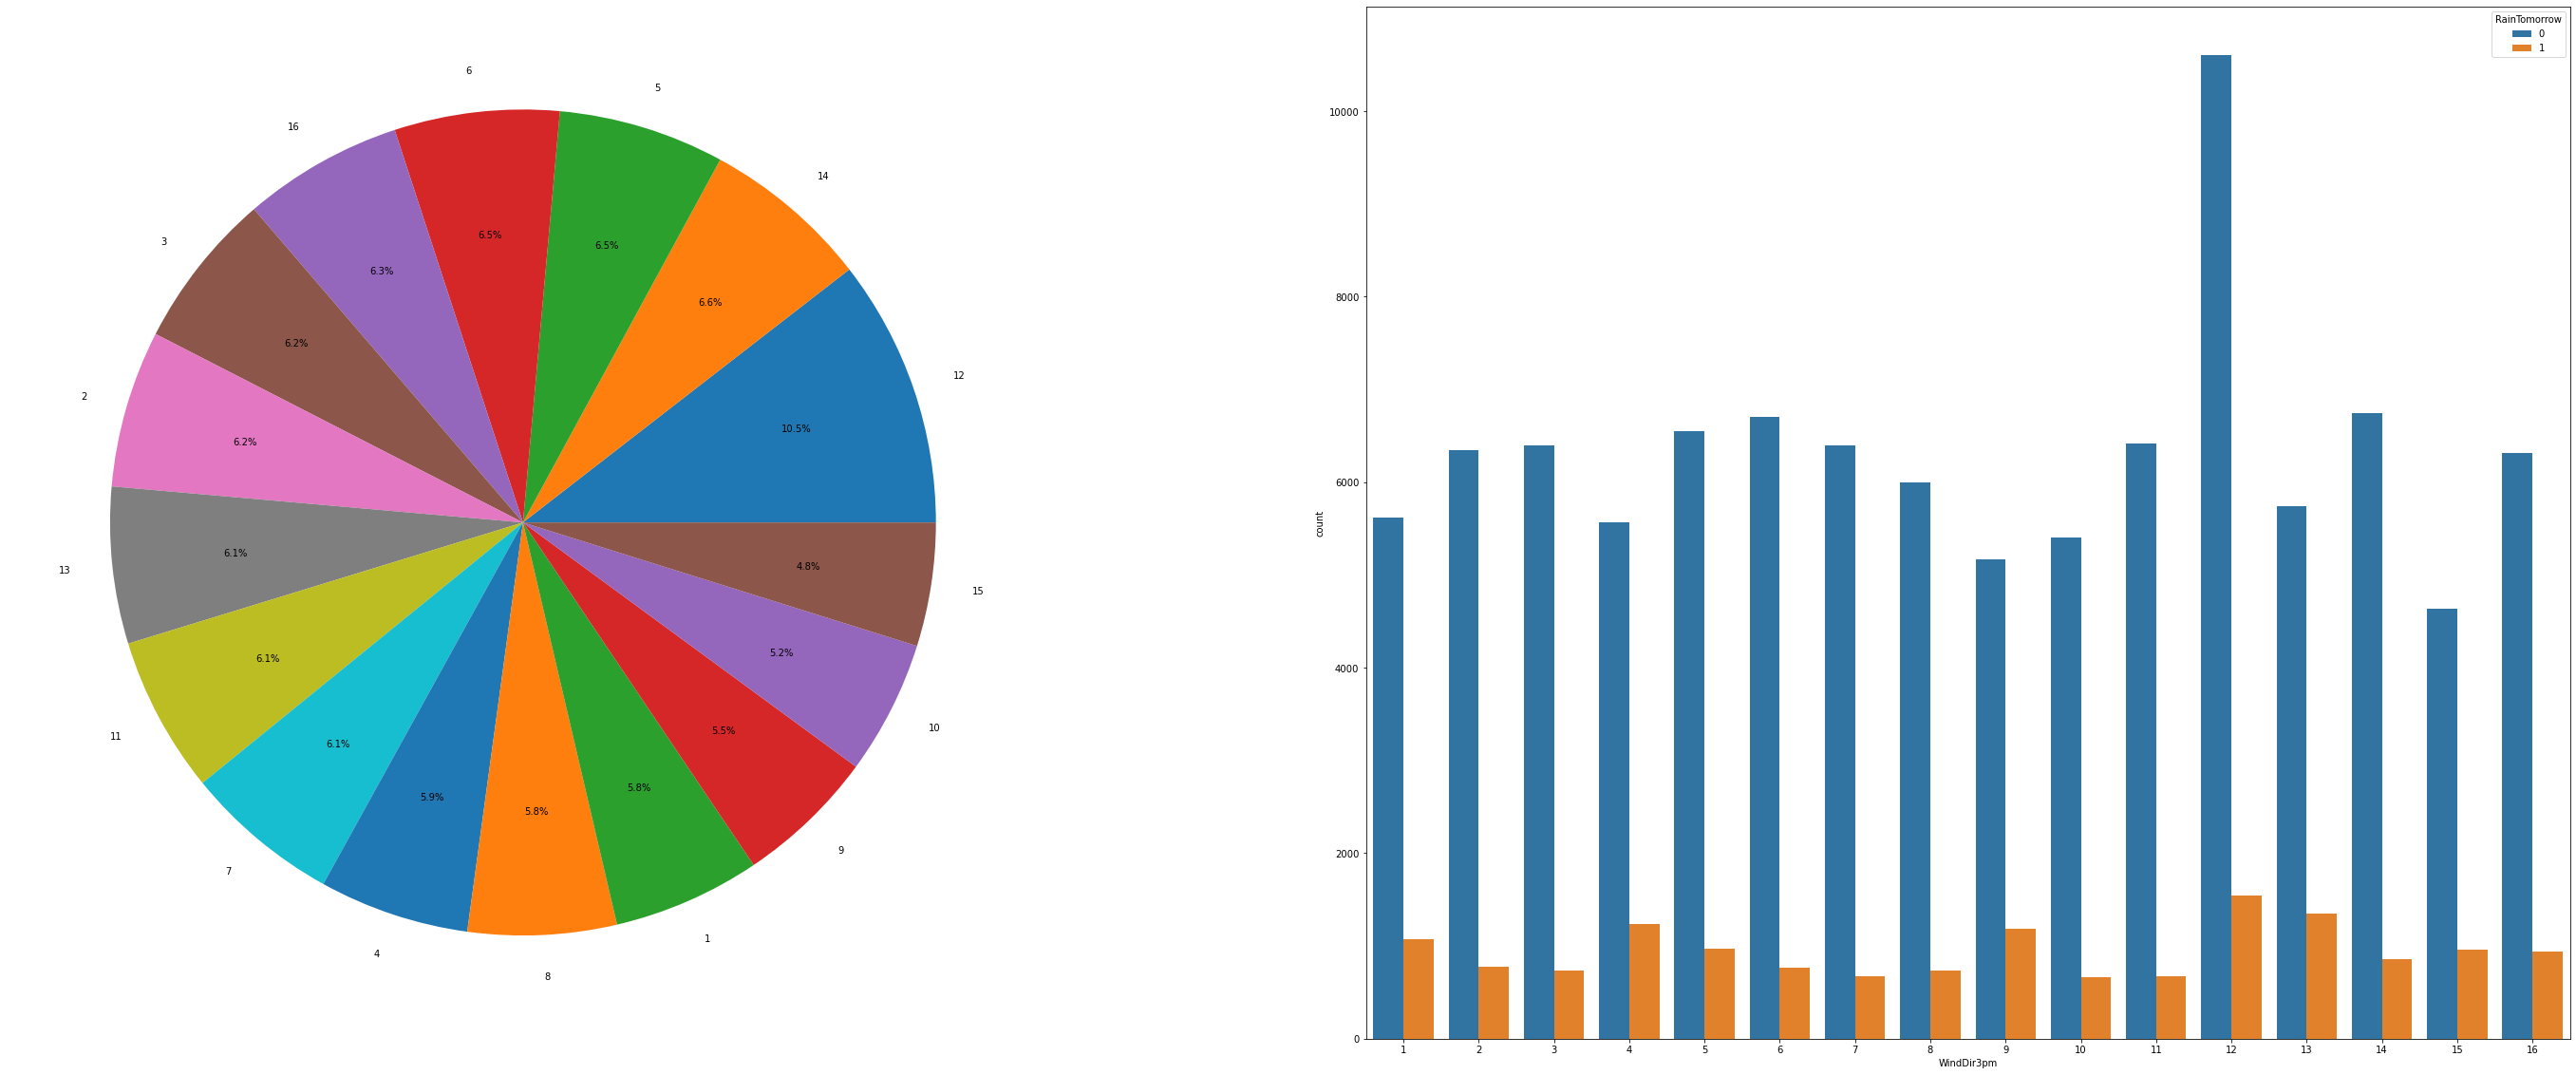

In [62]:
cat_plot('WindDir3pm')

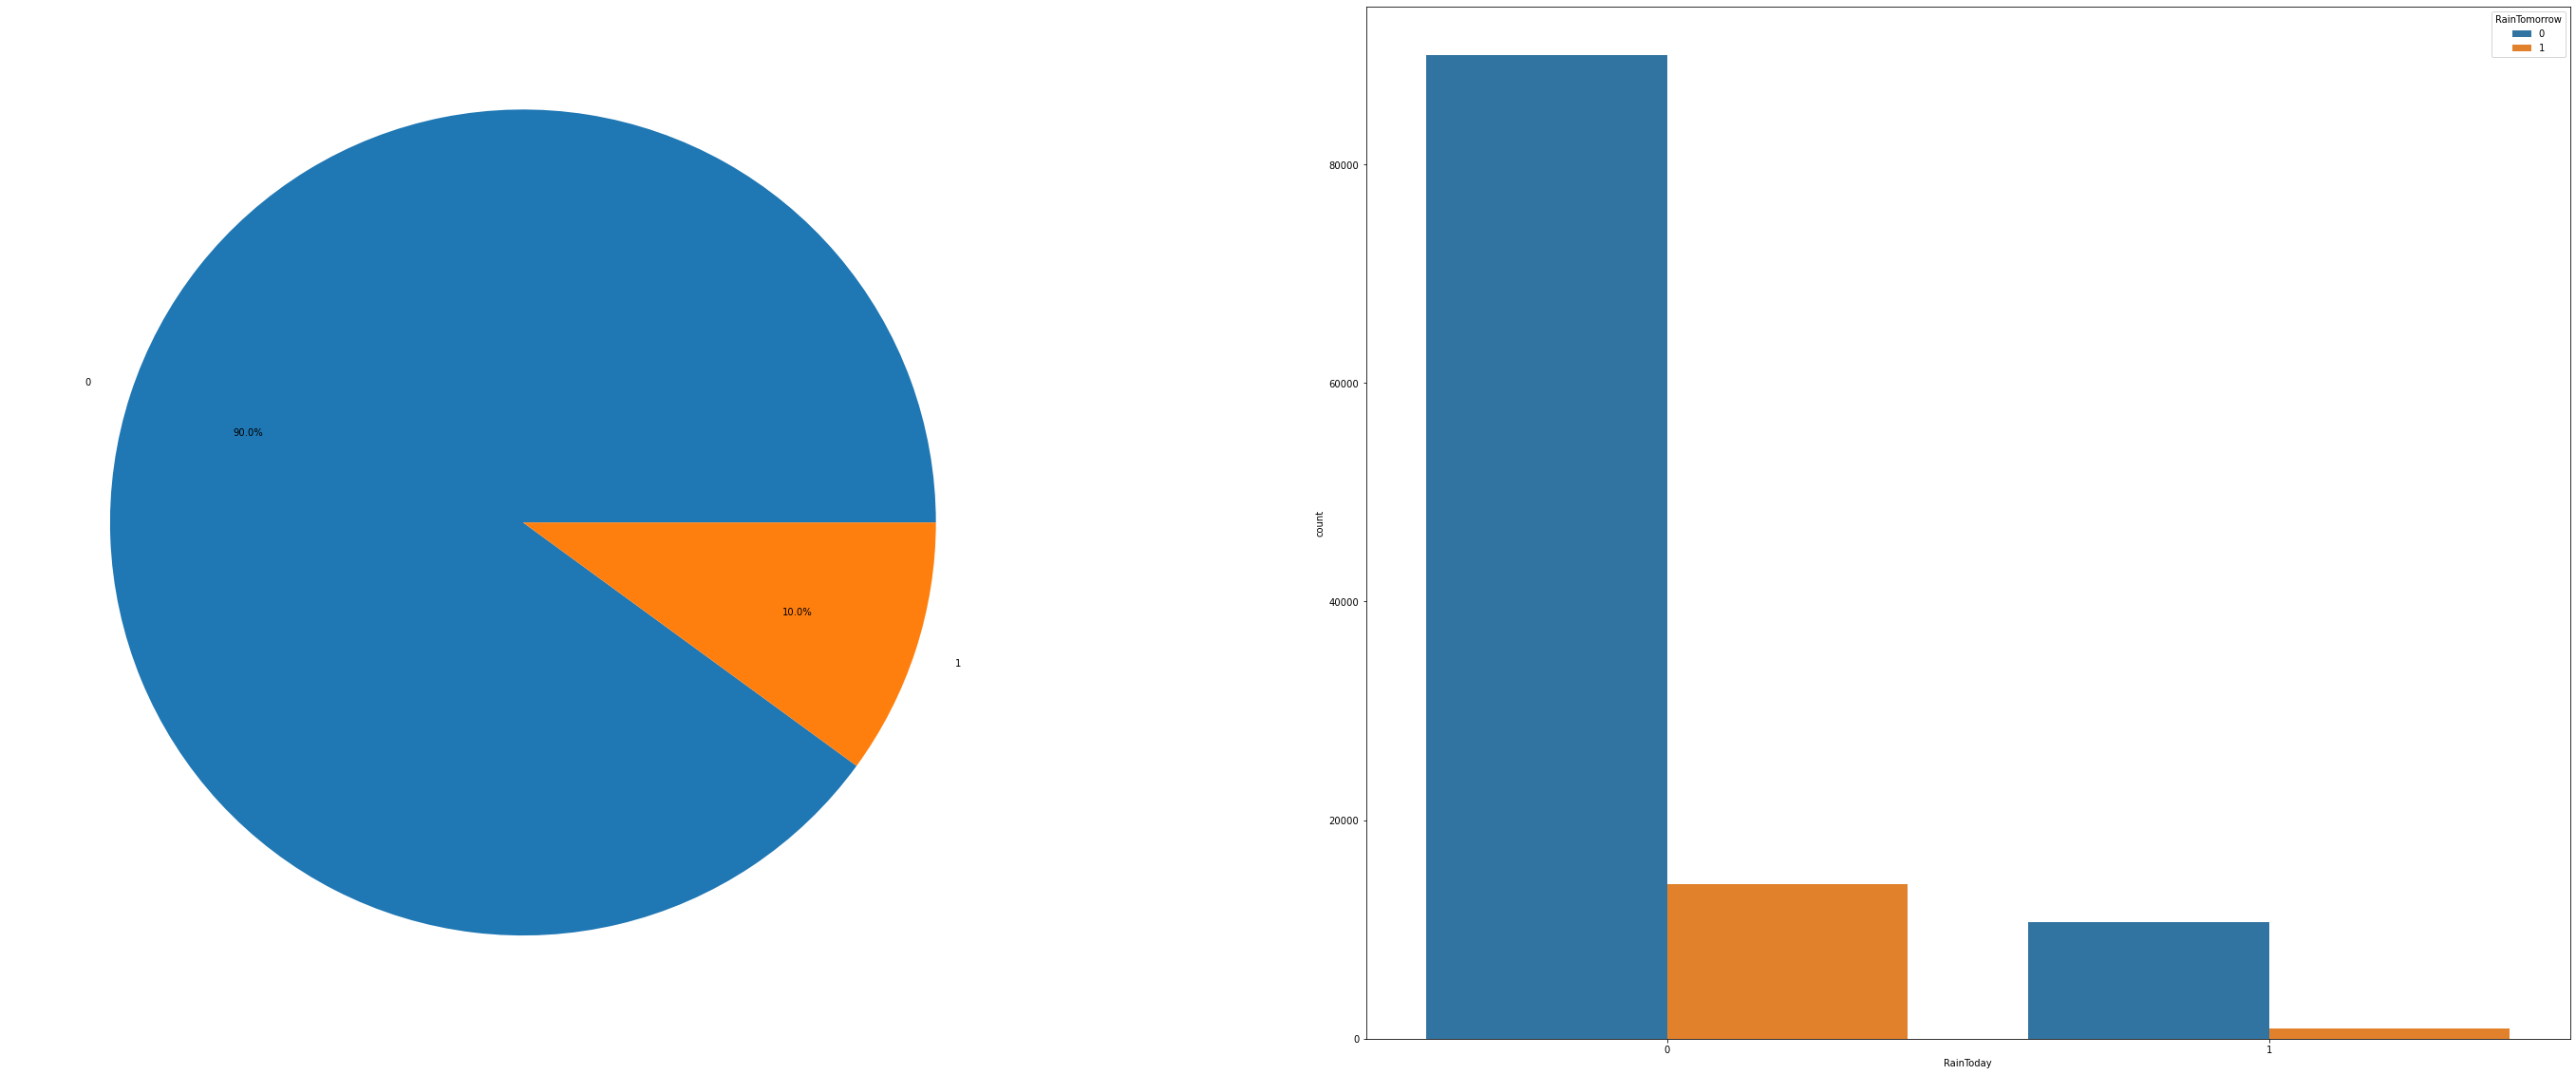

In [63]:
cat_plot('RainToday')

In [16]:
def num_plot(column, discrete = False):
    if discrete : 
        plt.figure(figsize = (15,7))
        sns.countplot(x = column, data = df, hue = "RainTomorrow")
        plt.show()
    else :
        plt.figure(figsize = (15,7))
        sns.jointplot(x = column, y = "RainTomorrow", data = df, kind = "reg")

In [ ]:
num_plot('MinTemp')

In [ ]:
num_plot('Rainfall')

In [ ]:
num_plot('Evaporation')

num_plot('Sunshine')

In [ ]:
num_plot('Sunshine')

In [17]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,1,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,2,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,3,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,4,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,1,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,15,31.0,ESE,E,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0,6
145455,Uluru,2.8,23.4,0.0,NaN,NaN,15,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,5,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,6,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0,6


In [18]:
print (df['WindDir9am'].unique())
print(df['WindDir9am'].describe())
df['WindDir9am']= df['WindDir9am'].fillna('N')
wind2 = {'W' : 1, 'NNW' : 2, 'SE' : 3, 'ENE' : 4, 'SW' : 5, 'SSE' : 6, 'S' : 7, 'NE' : 8, 'N' : 9, 'SSW' : 10, 'WSW' :11,
       'ESE' : 12, 'E' : 13, 'NW' : 14, 'WNW' : 15, 'NNE' : 16}
df['WindDir9am'] = df['WindDir9am'].map(wind2)
print()
print(df['WindDir9am'].dtypes)
df 

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
count     132180
unique        16
top            N
freq       11393
Name: WindDir9am, dtype: object

int64


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,1,44.0,1,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,2,44.0,2,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,3,46.0,1,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,4,24.0,3,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,1,41.0,4,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,15,31.0,12,E,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0,6
145455,Uluru,2.8,23.4,0.0,NaN,NaN,15,31.0,3,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,5,22.0,3,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,6,37.0,3,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0,6


In [19]:
print (df['WindDir3pm'].unique())
print (df['WindDir3pm'].describe())
df['WindDir3pm']= df['WindDir3pm'].fillna('SE')  #replacing NaN value with top value

wind3 = {'WNW' :1, 'WSW':2, 'E':3, 'NW':4 , 'W': 5 , 'SSE':6 , 'ESE':7 , 'ENE':8 , 'NNW':9, 'SSW':10,
       'SW' : 11, 'SE' : 12, 'N':13 , 'S': 14, 'NNE' : 15, 'NE' : 16}
df['WindDir3pm'] = df['WindDir3pm'].map(wind3)
df['WindDir3pm']= df['WindDir3pm'].astype(int)
print()
print(df['WindDir3pm'].dtypes)
df           

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
count     138415
unique        16
top           SE
freq       10663
Name: WindDir3pm, dtype: object

int64


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,1,44.0,1,1,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,2,44.0,2,2,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,3,46.0,1,2,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,4,24.0,3,3,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,1,41.0,4,4,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,15,31.0,12,3,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0,6
145455,Uluru,2.8,23.4,0.0,NaN,NaN,15,31.0,3,8,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,5,22.0,3,13,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,6,37.0,3,1,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0,6


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [21]:
maxtemp = list(df[df["MaxTemp"].isnull()].index)

df.groupby(["Month"])["MaxTemp"].mean()

Month
1     29.547362
2     28.877704
3     26.886744
4     23.611845
5     20.047202
6     17.324778
7     16.764242
8     18.258930
9     20.772510
10    23.540695
11    26.165571
12    27.526390
Name: MaxTemp, dtype: float64

In [22]:
for i in maxtemp:
    if df["Month"][i] == 1:
        df["MaxTemp"][i] = 30
    elif df["Month"][i] == 2:
        df["MaxTemp"][i] = 29
    elif df["Month"][i] == 3:
        df["MaxTemp"][i] = 27
    elif df["Month"][i] == 4:
        df["MaxTemp"][i] = 24
    elif df["Month"][i] == 5:
        df["MaxTemp"][i] = 20
    elif df["Month"][i] == 6:
        df["MaxTemp"][i] = 17
    elif df["Month"][i] == 7:
        df["MaxTemp"][i] = 17
    elif df["Month"][i] == 8:
        df["MaxTemp"][i] = 18
    elif df["Month"][i] == 9:
        df["MaxTemp"][i] = 21
    elif df["Month"][i] == 10:
        df["MaxTemp"][i] = 24
    elif df["Month"][i] == 11:
        df["MaxTemp"][i] = 26
    else:
        df["MaxTemp"][i] = 28

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/

In [23]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,1,44.0,1,1,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,2,44.0,2,2,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,3,46.0,1,2,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,4,24.0,3,3,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,1,41.0,4,4,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,15,31.0,12,3,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0,6
145455,Uluru,2.8,23.4,0.0,NaN,NaN,15,31.0,3,8,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,5,22.0,3,13,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,6,37.0,3,1,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0,6


In [24]:
mintemp = list(df[df["MinTemp"].isnull()].index)
df.groupby(["Month"])["MinTemp"].mean()

Month
1     17.520778
2     17.500239
3     15.904347
4     12.831979
5      9.618572
6      7.815031
7      6.951308
8      7.465145
9      9.460189
10    11.531145
11    14.299624
12    15.771514
Name: MinTemp, dtype: float64

In [25]:
for i in mintemp:
    if df["Month"][i] == 1:
        df["MinTemp"][i] = 18
    elif df["Month"][i] == 2:
        df["MinTemp"][i] = 18
    elif df["Month"][i] == 3:
        df["MinTemp"][i] = 16
    elif df["Month"][i] == 4:
        df["MinTemp"][i] = 13
    elif df["Month"][i] == 5:
        df["MinTemp"][i] = 10
    elif df["Month"][i] == 6:
        df["MinTemp"][i] = 8
    elif df["Month"][i] == 7:
        df["MinTemp"][i] = 7
    elif df["Month"][i] == 8:
        df["MinTemp"][i] = 7
    elif df["Month"][i] == 9:
        df["MinTemp"][i] = 9
    elif df["Month"][i] == 10:
        df["MinTemp"][i] = 12
    elif df["Month"][i] == 11:
        df["MinTemp"][i] = 14
    else:
        df["MinTemp"][i] = 16

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A val

In [26]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Month                0
dtype: int64

In [27]:
location = {'Albury' :0, 'BadgerysCreek' : 1, 'Cobar' : 2, 'CoffsHarbour' :3, 'Moree' : 4,
       'Newcastle' : 5, 'NorahHead' : 6, 'NorfolkIsland' : 7, 'Penrith': 8, 'Richmond' : 9,
       'Sydney': 10, 'SydneyAirport' : 11, 'WaggaWagga' : 12, 'Williamtown': 13,
       'Wollongong' : 14, 'Canberra' : 15, 'Tuggeranong': 16, 'MountGinini' :17, 'Ballarat' : 18,
       'Bendigo' : 19, 'Sale' : 20, 'MelbourneAirport' : 21, 'Melbourne' : 22, 'Mildura' : 23,
       'Nhil' : 24, 'Portland' : 25, 'Watsonia' : 26, 'Dartmoor' : 27, 'Brisbane' : 28, 'Cairns' : 29,
       'GoldCoast' : 30, 'Townsville' : 31, 'Adelaide' : 32, 'MountGambier' : 33, 'Nuriootpa' : 34,
       'Woomera' : 35, 'Albany' : 36, 'Witchcliffe': 37, 'PearceRAAF' : 38, 'PerthAirport' : 39,
       'Perth' : 40, 'SalmonGums' : 41, 'Walpole' : 42, 'Hobart' : 43, 'Launceston' : 44,
       'AliceSprings' : 45, 'Darwin' : 46, 'Katherine': 47, 'Uluru' : 48}
df['Location'] = df['Location'].map(location)
# creating dictionary function and mapping

df['Location'].unique() #checking unique values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [28]:
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
rToday = {'No':0 ,'Yes' : 1}
df['RainToday']= df['RainToday'].map(rToday)
df['RainToday']= df['RainToday'].astype(int)

print(df['RainToday'].dtypes)


int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [30]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
Month                0
dtype: int64

In [31]:
missing = df.select_dtypes(["int64", "float64"])

for column in missing.columns:
    df[column].fillna(df[column].mean(), inplace = True)



In [32]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

In [33]:
df.head(20)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,0,13.4,22.9,0.600000,5.469824,7.624853,1,44.0,1,1,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0,12
1,0,7.4,25.1,0.000000,5.469824,7.624853,2,44.0,2,2,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0,12
2,0,12.9,25.7,0.000000,5.469824,7.624853,3,46.0,1,2,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0,12
3,0,9.2,28.0,0.000000,5.469824,7.624853,4,24.0,3,3,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0,12
4,0,17.5,32.3,1.000000,5.469824,7.624853,1,41.0,4,4,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,12
5,0,14.6,29.7,0.200000,5.469824,7.624853,2,56.0,1,5,...,23.0,1009.2,1005.4,4.437189,4.503167,20.6,28.9,0,0,12
6,0,14.3,25.0,0.000000,5.469824,7.624853,1,50.0,5,5,...,19.0,1009.6,1008.2,1.000000,4.503167,18.1,24.6,0,0,12
7,0,7.7,26.7,0.000000,5.469824,7.624853,1,35.0,6,5,...,19.0,1013.4,1010.1,4.437189,4.503167,16.3,25.5,0,0,12
8,0,9.7,31.9,0.000000,5.469824,7.624853,5,80.0,3,4,...,9.0,1008.9,1003.6,4.437189,4.503167,18.3,30.2,0,1,12
9,0,13.1,30.1,1.400000,5.469824,7.624853,1,28.0,7,6,...,27.0,1007.0,1005.7,4.437189,4.503167,20.1,28.2,1,0,12


In [34]:
from collections import Counter
def outliers(data,columns):
    aykiri_indexler=[]
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 -Q1
        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR
        filtre = ((data[i] < alt_sinir) | (data[i] > ust_sinir))
        aykiri_gozlemler = data[i][filtre]
        aykiri_index = aykiri_gozlemler.index
        aykiri_indexler.extend(aykiri_index)
        
    aykiri_indexler = Counter(aykiri_indexler)
    ortak_indexler = [i for i,v in aykiri_indexler.items() if v>2]
    return ortak_indexler

In [35]:
x = df.select_dtypes(["float64", "int64"])
delete_index = outliers(df,x.columns)
df = df.drop(delete_index,axis=0).reset_index(drop=True)

In [36]:
df.shape

(115733, 23)

ax1 = sns.boxplot(x=df['MinTemp'])

ax2 = sns.boxplot(x=df['MaxTemp'])

In [37]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')>

<AxesSubplot:>

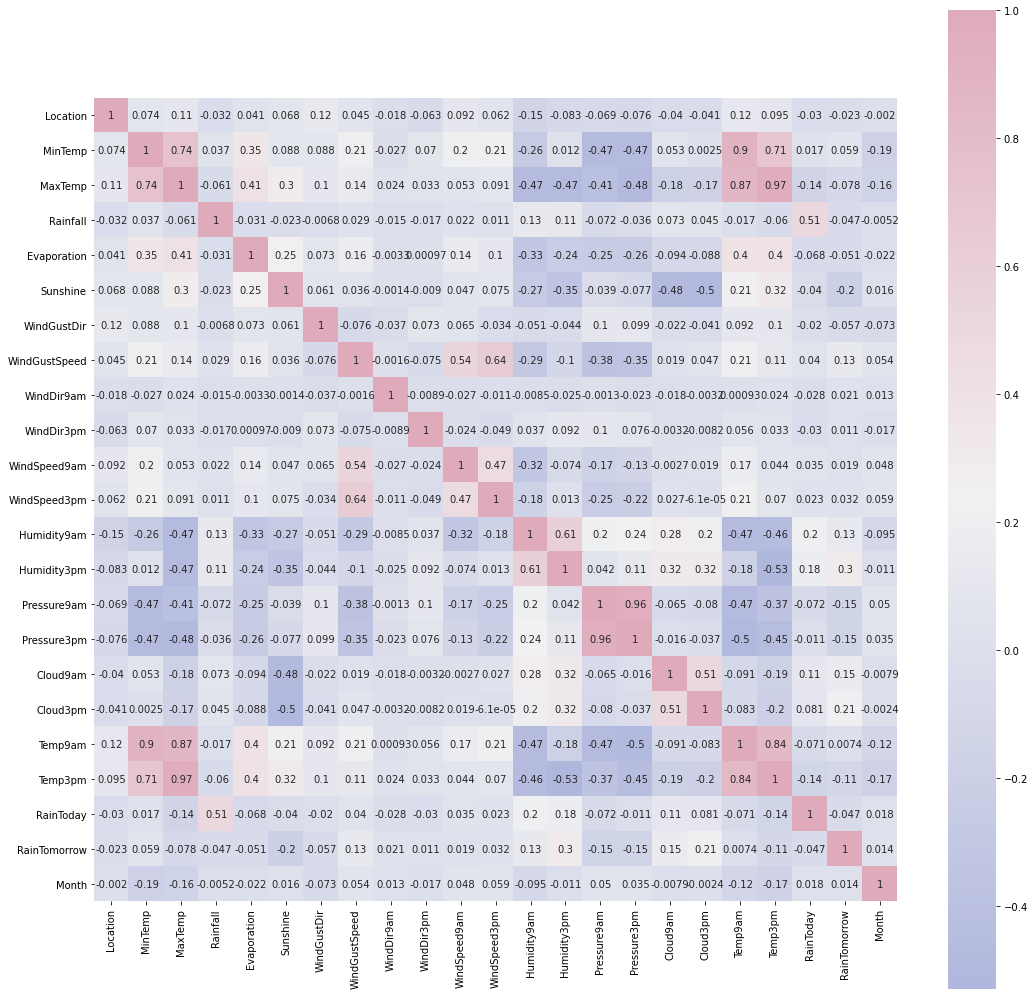

In [59]:
# Correlation map among numeric attributes
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [38]:
X = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday','Month']]
y = df['RainTomorrow']

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [39]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
X = scaler.fit_transform(X)  

In [40]:
X

array([[-1.64254284,  0.23179163, -0.10865249, ..., -0.04988569,
        -0.33392026,  1.63312947],
       [-1.64254284, -0.70696007,  0.21297037, ...,  0.32998027,
        -0.33392026,  1.63312947],
       [-1.64254284,  0.15356232,  0.30068569, ...,  0.16283925,
        -0.33392026,  1.63312947],
       ...,
       [ 1.74626435, -1.30150281,  0.24220881, ...,  0.36036954,
        -0.33392026, -0.115424  ],
       [ 1.74626435, -1.0198773 ,  0.47611634, ...,  0.60348375,
        -0.33392026, -0.115424  ],
       [ 1.74626435, -0.64437662,  0.49073556, ...,  0.58828911,
        -0.33392026, -0.115424  ]])

In [41]:
from sklearn.model_selection import train_test_split     #data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=12)

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=20, max_iter=100000, hidden_layer_sizes=30,learning_rate= 'adaptive', activation='tanh').fit(X_train, y_train)
mlp.score(X_test, y_test)

0.8935508398423999

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=20,max_features=None, n_estimators=200, random_state=12).fit(X_train, y_train)
rf.score(X_test, y_test)

0.8950715421303657

In [56]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf', gamma ='auto', max_iter = -1).fit(X_train, y_train)
SVC.score(X_test, y_test)

0.8918227690606207

In [58]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier( estimators=[('mlp', mlp), ('rf', rf), ('SVC', SVC)], voting='hard')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.895209787792908

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, random_state=12,max_features=None).fit(X_train, y_train)
dt.score(X_test, y_test)

from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100,algorithm = 'SAMME', learning_rate = 1.5, random_state=0).fit(X_train, y_train)
adb.score(X_test, y_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr.score(X_test, y_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)